In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# all relevant libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

In [3]:
#path1 = "../Data/features_30_sec.csv"
path2 = '/content/drive/MyDrive/GTZAN/Data/features_30_sec.csv'
dataset = pd.read_csv(path2)


In [ ]:
header_row = dataset.columns.tolist()
print(header_row)

['filename', 'length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var', 'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean', 'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var', 'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo', 'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean', 'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var', 'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean', 'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var', 'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean', 'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var', 'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean', 'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var', 'label']


In [ ]:
# Extract the MFCC feature columns
mfcc_columns = ['mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean', 'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var', 'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean', 'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var', 'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean', 'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var', 'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean', 'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var']

mfcc_features = dataset[mfcc_columns]

# Print the MFCC features
print(mfcc_features)

     mfcc1_mean     mfcc1_var  mfcc2_mean   mfcc2_var  mfcc3_mean   mfcc3_var   
0   -113.570648   2564.207520  121.571793  295.913818  -19.168142  235.574432  \
1   -207.501694   7764.555176  123.991264  560.259949    8.955127  572.810913   
2    -90.722595   3319.044922  140.446304  508.765045  -29.093889  411.781219   
3   -199.544205   5507.517090  150.090897  456.505402    5.662678  257.161163   
4   -160.337708   5195.291992  126.219635  853.784729  -35.587811  333.792938   
..          ...           ...         ...         ...         ...         ...   
995 -153.640961   2540.949463  109.864647  455.579956  -23.065695  189.883865   
996 -142.392029   3282.358887  116.189629  345.518890  -32.147167  191.464813   
997 -124.952271   1681.638794  115.177155  475.088074  -47.975151  290.302795   
998 -225.007751  10766.367188  123.646751  492.819122   -9.724174  605.487488   
999 -235.161972   7712.194336  123.870110  798.665283  -22.538395  518.708618   

     mfcc4_mean   mfcc4_var

In [4]:
# Split the dataset into features and labels
columns = ['filename','label']
features = dataset.drop(columns=columns, axis=1)  # Drop the 'label' column
labels = dataset['label']

In [5]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [6]:
# Initialize a scaler object
scaler = StandardScaler()

# Fit the scaler on the training features and transform the training features
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing features using the fitted scaler
X_test_scaled = scaler.transform(X_test)

In [7]:
# Reshape the features to a 3D array [samples, timesteps, features]
# Assuming your features have shape (num_samples, num_features)
num_timesteps = 1  # Adjust the number of timesteps based on your requirements
X_train_reshaped = np.reshape(X_train_scaled, (X_train_scaled.shape[0], num_timesteps, X_train_scaled.shape[1]))
X_test_reshaped = np.reshape(X_test_scaled, (X_test_scaled.shape[0], num_timesteps, X_test_scaled.shape[1]))

In [8]:
from sklearn.preprocessing import LabelEncoder

# Initialize a label encoder object
label_encoder = LabelEncoder()

# Fit and transform the label encoder on the training labels
y_train_encoded = label_encoder.fit_transform(y_train)

# Perform the same label encoding on the testing labels
y_test_encoded = label_encoder.transform(y_test)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=64, input_shape=(num_timesteps, X_train_reshaped.shape[2])))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=len(labels.unique()), activation='softmax'))  # Adjust the output units based on the number of classes

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_reshaped, y_train_encoded, epochs=600, batch_size=16)

Epoch 1/600
50/50 [==============================] - 2s 3ms/step - loss: 2.0791 - accuracy: 0.3288
Epoch 2/600
50/50 [==============================] - 0s 3ms/step - loss: 1.6115 - accuracy: 0.4387
Epoch 3/600
50/50 [==============================] - 0s 3ms/step - loss: 1.2884 - accuracy: 0.5725
Epoch 4/600
50/50 [==============================] - 0s 3ms/step - loss: 1.0573 - accuracy: 0.6675
Epoch 5/600
50/50 [==============================] - 0s 3ms/step - loss: 0.8848 - accuracy: 0.7200
Epoch 6/600
50/50 [==============================] - 0s 3ms/step - loss: 0.7595 - accuracy: 0.7725
Epoch 7/600
50/50 [==============================] - 0s 3ms/step - loss: 0.6583 - accuracy: 0.7962
Epoch 8/600
50/50 [==============================] - 0s 3ms/step - loss: 0.5701 - accuracy: 0.8225
Epoch 9/600
50/50 [==============================] - 0s 3ms/step - loss: 0.4955 - accuracy: 0.8562
Epoch 10/600
50/50 [==============================] - 0s 3ms/step - loss: 0.4345 - accuracy: 0.8662
Epoch 11/

In [11]:
y_pred = model.predict(X_test_reshaped)  # Make predictions on the scaled test data
y_pred_labels = np.argmax(y_pred, axis=1)
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test_encoded, y_pred_labels)  # Calculate accuracy
report = classification_report(y_test_encoded, y_pred_labels)  # Generate a detailed classification report
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

7/7 [==============================] - 1s 4ms/step
Accuracy: 0.71
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.70      0.68        20
           1       0.87      1.00      0.93        13
           2       0.65      0.63      0.64        27
           3       0.65      0.52      0.58        21
           4       0.59      0.87      0.70        15
           5       0.89      0.77      0.83        22
           6       0.81      0.88      0.85        25
           7       0.67      0.77      0.71        13
           8       0.65      0.48      0.55        23
           9       0.67      0.67      0.67        21

    accuracy                           0.71       200
   macro avg       0.71      0.73      0.71       200
weighted avg       0.71      0.71      0.71       200



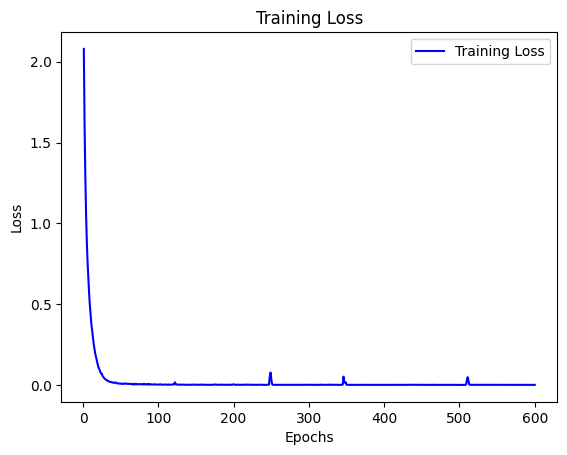

In [14]:
import matplotlib.pyplot as plt

# Extract the training and testing loss values from the history
train_loss = history.history['loss']
#val_loss = history.history['val_loss']

# Plot the training and validation loss
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [15]:
model.save('rnn_model2_epochs600_batch16.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(X_test_reshaped, y_test_encoded)
print(f'Test accuracy: {test_acc}')


7/7 [==============================] - 1s 2ms/step - loss: 1.0344 - accuracy: 0.6450
Test accuracy: 0.6449999809265137


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=128, input_shape=(num_timesteps, X_train_reshaped.shape[2]), return_sequences=True))
model.add(Dropout(0.2))  # Adding dropout for regularization

model.add(LSTM(units=64, return_sequences=True))
model.add(Dropout(0.2))  # Adding dropout for regularization

model.add(LSTM(units=32))  # Last LSTM layer without return_sequences
model.add(Dropout(0.2))  # Adding dropout for regularization

model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=len(labels.unique()), activation='softmax'))  # Adjust the output units based on the number of classes

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_reshaped, y_train_encoded, epochs=600, batch_size=32, validation_split=0.1)


Epoch 1/600
23/23 [==============================] - 9s 82ms/step - loss: 2.2894 - accuracy: 0.2722 - val_loss: 2.2606 - val_accuracy: 0.3375
Epoch 2/600
23/23 [==============================] - 0s 10ms/step - loss: 2.1858 - accuracy: 0.3597 - val_loss: 2.0447 - val_accuracy: 0.3125
Epoch 3/600
23/23 [==============================] - 0s 11ms/step - loss: 1.9592 - accuracy: 0.3611 - val_loss: 1.8287 - val_accuracy: 0.3500
Epoch 4/600
23/23 [==============================] - 0s 10ms/step - loss: 1.7372 - accuracy: 0.3931 - val_loss: 1.6180 - val_accuracy: 0.4000
Epoch 5/600
23/23 [==============================] - 0s 11ms/step - loss: 1.5350 - accuracy: 0.4236 - val_loss: 1.4376 - val_accuracy: 0.4500
Epoch 6/600
23/23 [==============================] - 0s 11ms/step - loss: 1.3871 - accuracy: 0.4597 - val_loss: 1.3081 - val_accuracy: 0.5000
Epoch 7/600
23/23 [==============================] - 0s 10ms/step - loss: 1.2734 - accuracy: 0.5236 - val_loss: 1.2160 - val_accuracy: 0.5375
Epoch 

In [17]:
y_pred = model.predict(X_test_reshaped)  # Make predictions on the scaled test data
y_pred_labels = np.argmax(y_pred, axis=1)
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test_encoded, y_pred_labels)  # Calculate accuracy
report = classification_report(y_test_encoded, y_pred_labels)  # Generate a detailed classification report
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

7/7 [==============================] - 1s 4ms/step
Accuracy: 0.705
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.85      0.71        20
           1       0.92      0.85      0.88        13
           2       0.82      0.67      0.73        27
           3       0.60      0.57      0.59        21
           4       0.57      0.80      0.67        15
           5       0.77      0.77      0.77        22
           6       0.78      0.84      0.81        25
           7       0.83      0.77      0.80        13
           8       0.59      0.43      0.50        23
           9       0.68      0.62      0.65        21

    accuracy                           0.70       200
   macro avg       0.72      0.72      0.71       200
weighted avg       0.71      0.70      0.70       200



In [18]:
model.save('rnn_model2_epochs600_batch32.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [21]:
##So it is quite visible we are overfitting

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Build the LSTM model with additional dropout and early stopping
model = Sequential()
model.add(LSTM(units=128, input_shape=(num_timesteps, X_train_reshaped.shape[2]), return_sequences=True))
model.add(Dropout(0.3))  # Increase dropout for regularization

model.add(LSTM(units=64, return_sequences=True))
model.add(Dropout(0.3))  # Increase dropout for regularization

model.add(LSTM(units=32))
model.add(Dropout(0.3))  # Increase dropout for regularization

model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=len(labels.unique()), activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Implement early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_reshaped, y_train_encoded, epochs=600, batch_size=16, validation_split=0.1, callbacks=[early_stopping])




Epoch 1/600
45/45 [==============================] - 10s 41ms/step - loss: 2.2722 - accuracy: 0.2556 - val_loss: 2.1796 - val_accuracy: 0.3500
Epoch 2/600
45/45 [==============================] - 0s 8ms/step - loss: 1.9485 - accuracy: 0.3236 - val_loss: 1.7240 - val_accuracy: 0.2875
Epoch 3/600
45/45 [==============================] - 0s 8ms/step - loss: 1.6472 - accuracy: 0.3306 - val_loss: 1.5545 - val_accuracy: 0.3125
Epoch 4/600
45/45 [==============================] - 0s 8ms/step - loss: 1.4652 - accuracy: 0.4194 - val_loss: 1.3991 - val_accuracy: 0.4625
Epoch 5/600
45/45 [==============================] - 0s 8ms/step - loss: 1.3191 - accuracy: 0.4986 - val_loss: 1.2895 - val_accuracy: 0.4750
Epoch 6/600
45/45 [==============================] - 0s 8ms/step - loss: 1.2220 - accuracy: 0.4958 - val_loss: 1.1994 - val_accuracy: 0.5375
Epoch 7/600
45/45 [==============================] - 0s 8ms/step - loss: 1.1137 - accuracy: 0.5847 - val_loss: 1.1041 - val_accuracy: 0.5625
Epoch 8/600

In [22]:
y_pred = model.predict(X_test_reshaped)  # Make predictions on the scaled test data
y_pred_labels = np.argmax(y_pred, axis=1)
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test_encoded, y_pred_labels)  # Calculate accuracy
report = classification_report(y_test_encoded, y_pred_labels)  # Generate a detailed classification report
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

7/7 [==============================] - 1s 3ms/step
Accuracy: 0.705
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.85      0.79        20
           1       0.92      0.92      0.92        13
           2       0.78      0.67      0.72        27
           3       0.43      0.48      0.45        21
           4       0.71      0.80      0.75        15
           5       0.90      0.86      0.88        22
           6       0.82      0.92      0.87        25
           7       0.62      0.77      0.69        13
           8       0.69      0.48      0.56        23
           9       0.45      0.43      0.44        21

    accuracy                           0.70       200
   macro avg       0.71      0.72      0.71       200
weighted avg       0.71      0.70      0.70       200



In [23]:
model.save('rnn_model3_epochs600_batch32_dropout.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()

model.add(LSTM(units=64, input_shape=(num_timesteps, X_train_reshaped.shape[2]), return_sequences=True))

model.add(LSTM(units=64, return_sequences=True))  # If you intend to add another LSTM layer after this

# Add a Dropout layer after LSTM(s)
model.add(Dropout(0.3))

# Add Dense layer(s) or output layer
model.add(Dense(units=len(labels.unique()), activation='softmax'))  # Output layer with softmax for classification

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Implement early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_reshaped, y_train_encoded, epochs=600, batch_size=128, validation_split=0.1, callbacks=[early_stopping])



Epoch 1/600
6/6 [==============================] - 9s 196ms/step - loss: 2.2884 - accuracy: 0.1010 - val_loss: 2.2723 - val_accuracy: 0.1025
Epoch 2/600
6/6 [==============================] - 0s 14ms/step - loss: 2.2538 - accuracy: 0.1048 - val_loss: 2.2397 - val_accuracy: 0.1022
Epoch 3/600
6/6 [==============================] - 0s 13ms/step - loss: 2.2154 - accuracy: 0.1066 - val_loss: 2.2000 - val_accuracy: 0.0986
Epoch 4/600
6/6 [==============================] - 0s 14ms/step - loss: 2.1644 - accuracy: 0.1055 - val_loss: 2.1499 - val_accuracy: 0.0966
Epoch 5/600
6/6 [==============================] - 0s 14ms/step - loss: 2.1022 - accuracy: 0.1047 - val_loss: 2.0878 - val_accuracy: 0.0958
Epoch 6/600
6/6 [==============================] - 0s 18ms/step - loss: 2.0312 - accuracy: 0.1047 - val_loss: 2.0150 - val_accuracy: 0.0950
Epoch 7/600
6/6 [==============================] - 0s 16ms/step - loss: 1.9461 - accuracy: 0.1041 - val_loss: 1.9375 - val_accuracy: 0.0950
Epoch 8/600
6/6 [==

In [31]:
from sklearn.metrics import accuracy_score, classification_report

# Convert the format of y_test_encoded to an array of integers if needed
y_test_encoded = np.array(y_test_encoded)

# Ensure y_pred_labels contains integers representing predicted classes
y_pred_labels = np.argmax(y_pred, axis=1)

# Calculate accuracy and generate a classification report
accuracy = accuracy_score(y_test_encoded, y_pred_labels)
report = classification_report(y_test_encoded, y_pred_labels)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


ValueError: ignored

In [32]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(X_test_reshaped, y_test_encoded)
print(f'Test accuracy: {test_acc}')

7/7 [==============================] - 0s 6ms/step - loss: 0.9908 - accuracy: 0.1144
Test accuracy: 0.11436855792999268
